In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy as sql
import pingouin as pg
import scipy as sc
import pandas as pd
import re
import ftfy
import numpy as np
import unicodedata
plt.style.use('ggplot')
%matplotlib inline

In [2]:
SERVER='LAPTOP-6GFL9EFK'
DATABASE='QUAN_LY_LOP_HOC'
DRIVER='ODBC Driver 17 for SQL Server'
USERNAME=''
PASSWORD=''
DATABASE_CONNECTION=f'mssql://{USERNAME}:{PASSWORD}@{SERVER}/{DATABASE}?driver={DRIVER}'

C:\Users\THONG\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
engine=sql.create_engine(DATABASE_CONNECTION)
connection=engine.connect()

In [4]:
worldcups=pd.read_sql_query("SELECT * \
                            FROM HON_HOP.[dbo].WorldCups",connection)
worldcups

,Year,Country,Winner,Runners_Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549.0
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000.0
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700.0
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246.0
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607.0
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810.0
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172.0
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135.0
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975.0
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753.0


In [5]:
worldcups.Year=worldcups.Year.apply(lambda a: str(a))

In [6]:
worldcups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            20 non-null     object 
 1   Country         20 non-null     object 
 2   Winner          20 non-null     object 
 3   Runners_Up      20 non-null     object 
 4   Third           20 non-null     object 
 5   Fourth          20 non-null     object 
 6   GoalsScored     20 non-null     int64  
 7   QualifiedTeams  20 non-null     int64  
 8   MatchesPlayed   20 non-null     int64  
 9   Attendance      20 non-null     float64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.7+ KB


In [7]:
worldcupmatches=pd.read_sql_query("SELECT * \
                            FROM HON_HOP.[dbo].WorldCupMatches",connection)
worldcupmatches.dropna(inplace=True)
worldcupmatches.Year=worldcupmatches.Year.apply(lambda a: int(a))
worldcupmatches.Home_Team_Goals=worldcupmatches.Home_Team_Goals.apply(lambda a: int(a))
worldcupmatches.Away_Team_Goals=worldcupmatches.Away_Team_Goals.apply(lambda a: int(a))
worldcupmatches

,Year,Datetime,Stage,Stadium,City,Home_Team_Name,Home_Team_Goals,Away_Team_Goals,Away_Team_Name,Win_conditions,Attendance,Half_time_Home_Goals,Half_time_Away_Goals,Referee,Assistant_1,Assistant_2,RoundID,MatchID,Home_Team_Initials,Away_Team_Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141.0,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),63267.0,0,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,68034.0,0,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [8]:
worldcupmatches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  850 non-null    int64  
 1   Datetime              850 non-null    object 
 2   Stage                 850 non-null    object 
 3   Stadium               850 non-null    object 
 4   City                  850 non-null    object 
 5   Home_Team_Name        850 non-null    object 
 6   Home_Team_Goals       850 non-null    int64  
 7   Away_Team_Goals       850 non-null    int64  
 8   Away_Team_Name        850 non-null    object 
 9   Win_conditions        850 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half_time_Home_Goals  850 non-null    object 
 12  Half_time_Away_Goals  850 non-null    object 
 13  Referee               850 non-null    object 
 14  Assistant_1           850 non-null    object 
 15  Assistant_2           8

In [9]:
worldcupplayers=pd.read_sql_query("SELECT * \
                            FROM HON_HOP.[dbo].WorldCupPlayers",connection)
worldcupplayers

,RoundID,MatchID,Team_Initials,Coach_Name,Line_up,Shirt_Number,Player_Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,None
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,None
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,None,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,None,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,None,None
...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,None,None
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,None,None
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,None,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,None,None


In [10]:
worldcupplayers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team_Initials  37784 non-null  object
 3   Coach_Name     37784 non-null  object
 4   Line_up        37784 non-null  object
 5   Shirt_Number   37784 non-null  object
 6   Player_Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(2), object(7)
memory usage: 2.6+ MB


In [11]:
worldcupplayers.Coach_Name.value_counts()

SCOLARI Luiz Felipe (BRA)         575
SCHOEN Helmut (FRG)               550
PARREIRA Carlos Alberto (BRA)     514
MILUTINOVIC Bora (YUG)            443
ZAGALLO Mario (BRA)               440
                                 ... 
PASCUCCI Felipe (ITA)              18
VAN MASTENBROEK Johannes (NED)     18
McREA James (SCO)                  17
LUIZ VINHAES (BRA)                 17
RADULESCU Constantin (ROU)         15
Name: Coach_Name, Length: 335, dtype: int64

In [12]:
worldcupmatches1=worldcupmatches
worldcupmatches1

,Year,Datetime,Stage,Stadium,City,Home_Team_Name,Home_Team_Goals,Away_Team_Goals,Away_Team_Name,Win_conditions,Attendance,Half_time_Home_Goals,Half_time_Away_Goals,Referee,Assistant_1,Assistant_2,RoundID,MatchID,Home_Team_Initials,Away_Team_Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141.0,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),63267.0,0,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,68034.0,0,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [13]:
worldcupmatches1.Home_Team_Name.unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Germany FR', 'Turkey',
       'Soviet Union', 'Northern Ireland', 'Mexico', 'Wales', 'Portugal',
       'Korea DPR', 'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire',
       'Poland', 'Australia', 'Scotland', 'Netherlands', 'Haiti',
       'Tunisia', 'Algeria', 'Honduras', 'Canada', 'Morocco',
       'Korea Republic', 'Iraq', 'Denmark', 'rn">United Arab Emirates',
       'Costa Rica', 'Cameroon', 'rn">Republic of Ireland', 'Colombia',
       'Norway', 'Nigeria', 'Saudi Arabia', 'Bolivia', 'Russia', 'Greece',
       'Jamaica', 'South Africa', 'Japan', 'Croatia', 'China PR',
       'Senegal', 'Slovenia', 'Ecuador', 'rn">Trinidad and Tobago',
       'rn">Serbia and Montenegro', 'Angola', 'Czech Republic', 'Togo',
       'Iran', "C�te d'Ivoire", 'Ghana

In [15]:
def regex_xoa_rn(a):
    pt='rn">'
    data=a
    c=re.split(pt,data)
    if len(c)==2:
        return c[1]
    return c[0]

In [16]:
worldcupmatches1.Home_Team_Name=worldcupmatches1.Home_Team_Name.apply(regex_xoa_rn)
worldcupmatches1.Away_Team_Name=worldcupmatches1.Away_Team_Name.apply(regex_xoa_rn)

In [17]:
worldcupmatches1

,Year,Datetime,Stage,Stadium,City,Home_Team_Name,Home_Team_Goals,Away_Team_Goals,Away_Team_Name,Win_conditions,Attendance,Half_time_Home_Goals,Half_time_Away_Goals,Referee,Assistant_1,Assistant_2,RoundID,MatchID,Home_Team_Initials,Away_Team_Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141.0,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),63267.0,0,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,68034.0,0,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED


In [18]:
worldcupmatches1.Away_Team_Name.unique()

array(['Mexico', 'Belgium', 'Brazil', 'Peru', 'France', 'Bolivia',
       'Paraguay', 'Romania', 'Chile', 'USA', 'Yugoslavia', 'Argentina',
       'Egypt', 'Netherlands', 'Switzerland', 'Sweden', 'Spain',
       'Hungary', 'Austria', 'Germany', 'Czechoslovakia',
       'Dutch East Indies', 'Norway', 'Poland', 'Cuba', 'Italy',
       'England', 'Scotland', 'Turkey', 'Korea Republic', 'Germany FR',
       'Uruguay', 'Wales', 'Northern Ireland', 'Soviet Union', 'Colombia',
       'Bulgaria', 'Korea DPR', 'Portugal', 'Israel', 'Morocco',
       'El Salvador', 'Australia', 'Haiti', 'German DR', 'Zaire',
       'IR Iran', 'Tunisia', 'Iran', 'Cameroon', 'New Zealand', 'Algeria',
       'Honduras', 'Kuwait', 'Iraq', 'Denmark', 'Canada',
       'Republic of Ireland', 'United Arab Emirates', 'Costa Rica',
       'Saudi Arabia', 'Russia', 'Greece', 'Nigeria', 'South Africa',
       'Japan', 'Croatia', 'Jamaica', 'Senegal', 'Slovenia', 'Ecuador',
       'China PR', "C�te d'Ivoire", 'Czech Republic

In [19]:
worldcupmatches1.Home_Team_Name.unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Germany FR', 'Turkey',
       'Soviet Union', 'Northern Ireland', 'Mexico', 'Wales', 'Portugal',
       'Korea DPR', 'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire',
       'Poland', 'Australia', 'Scotland', 'Netherlands', 'Haiti',
       'Tunisia', 'Algeria', 'Honduras', 'Canada', 'Morocco',
       'Korea Republic', 'Iraq', 'Denmark', 'United Arab Emirates',
       'Costa Rica', 'Cameroon', 'Republic of Ireland', 'Colombia',
       'Norway', 'Nigeria', 'Saudi Arabia', 'Bolivia', 'Russia', 'Greece',
       'Jamaica', 'South Africa', 'Japan', 'Croatia', 'China PR',
       'Senegal', 'Slovenia', 'Ecuador', 'Trinidad and Tobago',
       'Serbia and Montenegro', 'Angola', 'Czech Republic', 'Togo',
       'Iran', "C�te d'Ivoire", 'Ghana', 'Ukraine', 'S

# Xem xét file worldcups

In [20]:
worldcups

,Year,Country,Winner,Runners_Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549.0
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000.0
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700.0
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246.0
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607.0
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810.0
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172.0
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135.0
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975.0
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753.0


In [21]:
worldcups.Winner.value_counts()

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
England       1
Spain         1
Germany       1
France        1
Name: Winner, dtype: int64

In [22]:
a=worldcups.groupby('Winner')['Winner','Runners_Up','Third'].count()
a

<ipython-input-22-f015032fbe93>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a=worldcups.groupby('Winner')['Winner','Runners_Up','Third'].count()


,Winner,Runners_Up,Third
Winner,,,
Argentina,2,2,2
Brazil,5,5,5
England,1,1,1
France,1,1,1
Germany,1,1,1
Germany FR,3,3,3
Italy,4,4,4
Spain,1,1,1
Uruguay,2,2,2


German và German FR là một nên cần chuyển thành cùng tên

In [23]:
worldcups.columns

Index(['Year', 'Country', 'Winner', 'Runners_Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')

In [24]:
def regex_german(a):
    pt='German'
    data=a
    c=re.findall(pt,data)
    if len(c)==1:
        return c[0]
    return a

In [25]:
target={'Winner','Runners_Up','Third','Fourth'}
for i in worldcups.columns:
    if i in target:
        worldcups[i]=worldcups[i].apply(regex_german)
worldcups

,Year,Country,Winner,Runners_Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549.0
1,1934,Italy,Italy,Czechoslovakia,German,Austria,70,16,17,363000.0
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700.0
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246.0
4,1954,Switzerland,German,Hungary,Austria,Uruguay,140,16,26,768607.0
5,1958,Sweden,Brazil,Sweden,France,German,126,16,35,819810.0
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172.0
7,1966,England,England,German,Portugal,Soviet Union,89,16,32,1563135.0
8,1970,Mexico,Brazil,Italy,German,Uruguay,95,16,32,1603975.0
9,1974,Germany,German,Netherlands,Poland,Brazil,97,16,38,1865753.0


In [26]:
worldcups.Winner.value_counts()

Brazil       5
Italy        4
German       4
Uruguay      2
Argentina    2
England      1
Spain        1
France       1
Name: Winner, dtype: int64

In [27]:
target=['Winner','Runners_Up','Third','Fourth']
tru=[]
for i in worldcups.columns:
    if i in target:
        a=worldcups[i].value_counts().to_dict()
        tru.append(a)


new_Dataframe=pd.DataFrame(data=tru,index=target).T.fillna('-')
new_Dataframe

target1=['Winner_TB','Runners_Up_TB','Third_TB','Fourth_TB']
new_Dataframe.index
cot_moi=[]
for z in target:
    danh_sach={}
    for i in new_Dataframe.index:
        tong=worldcups.GoalsScored[worldcups[z]==i].mean()
        if tong !=0:
            danh_sach[i]=np.round(tong,0)
        else:
            danh_sach[i]=np.nan
    cot_moi.append(danh_sach)
    danh_sach={}

new_Dataframe_up=pd.DataFrame(data=cot_moi,index=target1).T.fillna('-')

tong_hop=new_Dataframe.join(new_Dataframe_up)
tong_hop

,Winner,Runners_Up,Third,Fourth,Winner_TB,Runners_Up_TB,Third_TB,Fourth_TB
Brazil,5.0,2.0,2.0,2.0,122.0,130.0,93.0,134.0
Italy,4.0,2.0,1.0,1.0,112.0,118.0,115.0,102.0
German,4.0,4.0,4.0,1.0,131.0,132.0,114.0,126.0
Uruguay,2.0,-,-,3.0,79.0,-,-,127.0
Argentina,2.0,3.0,-,-,117.0,119.0,-,-
England,1.0,-,-,1.0,89.0,-,-,115.0
Spain,1.0,-,-,1.0,145.0,-,-,88.0
France,1.0,1.0,2.0,1.0,171.0,147.0,129.0,146.0
Netherlands,-,3.0,1.0,1.0,-,115.0,171.0,171.0
Hungary,-,2.0,-,-,-,112.0,-,-


In [28]:
target=['Winner','Runners_Up','Third','Fourth']
tru=[]
for i in worldcups.columns:
    if i in target:
        a=worldcups[i].value_counts().to_dict()
        tru.append(a)


new_Dataframe=pd.DataFrame(data=tru,index=target).T.fillna('-')
new_Dataframe

target1=['Winner_TB','Runners_Up_TB','Third_TB','Fourth_TB']
new_Dataframe.index
cot_moi=[]
for z in target:
    danh_sach={}
    for i in new_Dataframe.index:
        tong=worldcups.GoalsScored[worldcups[z]==i].sum()
        if tong !=0:
            danh_sach[i]=np.round(tong,0)
        else:
            danh_sach[i]=np.nan
    cot_moi.append(danh_sach)
    danh_sach={}

new_Dataframe_up=pd.DataFrame(data=cot_moi,index=target1).T.fillna('-')

tong_hop=new_Dataframe.join(new_Dataframe_up)
tong_hop

,Winner,Runners_Up,Third,Fourth,Winner_TB,Runners_Up_TB,Third_TB,Fourth_TB
Brazil,5.0,2.0,2.0,2.0,612.0,259.0,186.0,268.0
Italy,4.0,2.0,1.0,1.0,447.0,236.0,115.0,102.0
German,4.0,4.0,4.0,1.0,523.0,528.0,457.0,126.0
Uruguay,2.0,-,-,3.0,158.0,-,-,380.0
Argentina,2.0,3.0,-,-,234.0,356.0,-,-
England,1.0,-,-,1.0,89.0,-,-,115.0
Spain,1.0,-,-,1.0,145.0,-,-,88.0
France,1.0,1.0,2.0,1.0,171.0,147.0,258.0,146.0
Netherlands,-,3.0,1.0,1.0,-,344.0,171.0,171.0
Hungary,-,2.0,-,-,-,224.0,-,-


In [180]:
tong_hop.index

Index(['Brazil', 'Italy', 'German', 'Uruguay', 'Argentina', 'England', 'Spain',
       'France', 'Netherlands', 'Hungary', 'Czechoslovakia', 'Sweden',
       'Poland', 'USA', 'Turkey', 'Portugal', 'Austria', 'Chile', 'Croatia',
       'Yugoslavia', 'Korea Republic', 'Belgium', 'Soviet Union', 'Bulgaria'],
      dtype='object')

In [30]:
new_Dataframe.index
cot_moi=[]
for z in target:
    danh_sach={}
    for i in new_Dataframe.index:
        tong=worldcups.GoalsScored[worldcups[z]==i].sum()
        danh_sach[i]=tong
    cot_moi.append(danh_sach)
    danh_sach={}
cot_moi[0]

{'Brazil': 612,
 'Italy': 447,
 'German': 523,
 'Uruguay': 158,
 'Argentina': 234,
 'England': 89,
 'Spain': 145,
 'France': 171,
 'Netherlands': 0,
 'Hungary': 0,
 'Czechoslovakia': 0,
 'Sweden': 0,
 'Poland': 0,
 'USA': 0,
 'Turkey': 0,
 'Portugal': 0,
 'Austria': 0,
 'Chile': 0,
 'Croatia': 0,
 'Yugoslavia': 0,
 'Korea Republic': 0,
 'Belgium': 0,
 'Soviet Union': 0,
 'Bulgaria': 0}

- Trong các mùa WC mà Brazil tham dự và đứng hạng 1,2,4 thì số lượng bàn thắng tổng thể khá đồng đều. Còn khi Brazil đứng thứ 3 thì số bàn thắng tổng thể thấp hơn đáng kể. Các đội đứng đầu (trừ Italy do ít mẫu) đều cho thấy khi những đội này giành hạng 3 thì số bàn được ghi trong kỳ WC đó thấp hơn đó thấp hơn đáng kể so với các hạng khác ?

- Rất khó để tìm ra gì đứng sau dữ liệu này, thêm nữa số lượng các nhóm là các nước do đó sẽ rất khó khăn để phân loại và nhìn ra sự khác biệt
- Vì vậy cách tốt nhất là ta nên gom nhóm dựa trên xếp hạng WC của các nhóm để giúp ta giảm số lượng biến nhóm lại

Từ đó ta có thể phân thành 4 nhóm biến dựa trên các đội dựa trên hạng 1,2,3,4
- Qua xem xét có một số đội thuộc 1 lần 2 nhóm => loại các đội này ra nếu không thấy được điểm nổi bật
- Nhóm 1 bao gồm các đội từng Winner: 'Brazil', 'Italy', 'German', 'Uruguay', 'Argentina', 'England', 'Spain','France'
- Nhóm 2: 'Netherlands', 'Hungary', 'Czechoslovakia'
- Nhóm 3: 'Sweden','Poland', 'USA', 'Turkey', 'Portugal', 'Austria', 'Chile', 'Croatia'
- Nhóm 4:'Yugoslavia', 'Korea Republic', 'Belgium', 'Soviet Union', 'Bulgaria'

Như vậy ta đã chia thành 24 đội đứng hạng từ 1-4 thành còn 4 nhóm nhỏ đại diện cho mạnh đến yếu dựa trên số hạng. Điều này có ích khi dùng phân tích data WC match do sẽ giảm được đáng kể các biến cần so sánh để tìm ra đặc trưng sự khác biệt của từng nhóm.

In [201]:
cac_doi_con_lai= ['Brazil', 'Italy', 'German', 'Uruguay', 'Argentina', 'England', 'Spain',
       'France', 'Netherlands', 'Hungary', 'Czechoslovakia', 'Sweden',
       'Poland', 'USA', 'Turkey', 'Portugal', 'Austria', 'Chile', 'Croatia',
       'Yugoslavia', 'Korea Republic', 'Belgium', 'Soviet Union', 'Bulgaria']
nhom_1=['Brazil', 'Italy', 'German', 'Uruguay', 'Argentina', 'England', 'Spain','France']
nhom_2=['Netherlands', 'Hungary', 'Czechoslovakia']
nhom_3=['Sweden','Poland', 'USA', 'Turkey', 'Portugal', 'Austria', 'Chile', 'Croatia']
nhom_4=['Yugoslavia', 'Korea Republic', 'Belgium', 'Soviet Union', 'Bulgaria']
len(cac_doi_con_lai)

24

# Xem xét world cup match

In [182]:
bo_bot_cot=worldcupmatches1[['Year','Home_Team_Name','Home_Team_Goals','Away_Team_Name','Away_Team_Goals',
                            'Attendance','Half_time_Home_Goals','Half_time_Away_Goals']]
bo_bot_cot

,Year,Home_Team_Name,Home_Team_Goals,Away_Team_Name,Away_Team_Goals,Attendance,Half_time_Home_Goals,Half_time_Away_Goals
0,1930,France,4,Mexico,1,4444.0,3,0
1,1930,USA,3,Belgium,0,18346.0,2,0
2,1930,Yugoslavia,2,Brazil,1,24059.0,2,0
3,1930,Romania,3,Peru,1,2549.0,1,0
4,1930,Argentina,1,France,0,23409.0,0,0
...,...,...,...,...,...,...,...,...
847,2014,Netherlands,0,Costa Rica,0,51179.0,0,0
848,2014,Brazil,1,Germany,7,58141.0,0,5
849,2014,Netherlands,0,Argentina,0,63267.0,0,0
850,2014,Brazil,0,Netherlands,3,68034.0,0,2


In [191]:
a = bo_bot_cot.Home_Team_Name.unique()
a

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'German', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Turkey', 'Soviet Union',
       'Northern Ireland', 'Mexico', 'Wales', 'Portugal',
       'Korea Republic', 'Peru', 'Belgium', 'Bulgaria', 'Zaire', 'Poland',
       'Australia', 'Scotland', 'Netherlands', 'Haiti', 'Tunisia',
       'Algeria', 'Honduras', 'Canada', 'Morocco', 'Iraq', 'Denmark',
       'United Arab Emirates', 'Costa Rica', 'Cameroon',
       'Republic of Ireland', 'Colombia', 'Norway', 'Nigeria',
       'Saudi Arabia', 'Bolivia', 'Russia', 'Greece', 'Jamaica',
       'South Africa', 'Japan', 'Croatia', 'China PR', 'Senegal',
       'Slovenia', 'Ecuador', 'Trinidad and Tobago',
       'Serbia and Montenegro', 'Angola', 'Czech Republic', 'Togo',
       'Iran', "C�te d'Ivoire", 'Ghana', 'Ukraine', 'Serbia',
       'New Zealand', 'Slovakia',

In [192]:
c=[]
d=[]
for i in a:
    if i in cac_doi_con_lai:
        c.append(i)
    else:
        d.append(i)

for i in cac_doi_con_lai:
    if i not in c:
        print(i)

print(c)
print(d)

['France', 'USA', 'Yugoslavia', 'Argentina', 'Chile', 'Uruguay', 'Brazil', 'Austria', 'Hungary', 'Sweden', 'German', 'Spain', 'Italy', 'Czechoslovakia', 'England', 'Turkey', 'Soviet Union', 'Portugal', 'Korea Republic', 'Belgium', 'Bulgaria', 'Poland', 'Netherlands', 'Croatia']
['Romania', 'Paraguay', 'Switzerland', 'Cuba', 'Northern Ireland', 'Mexico', 'Wales', 'Peru', 'Zaire', 'Australia', 'Scotland', 'Haiti', 'Tunisia', 'Algeria', 'Honduras', 'Canada', 'Morocco', 'Iraq', 'Denmark', 'United Arab Emirates', 'Costa Rica', 'Cameroon', 'Republic of Ireland', 'Colombia', 'Norway', 'Nigeria', 'Saudi Arabia', 'Bolivia', 'Russia', 'Greece', 'Jamaica', 'South Africa', 'Japan', 'China PR', 'Senegal', 'Slovenia', 'Ecuador', 'Trinidad and Tobago', 'Serbia and Montenegro', 'Angola', 'Czech Republic', 'Togo', 'Iran', "C�te d'Ivoire", 'Ghana', 'Ukraine', 'Serbia', 'New Zealand', 'Slovakia', 'IR Iran', 'Bosnia and Herzegovina']


In [185]:
def regex_german(a):
    pt='German'
    data=a
    c=re.findall(pt,data)
    if len(c)==1:
        return c[0]
    return a

In [189]:
def test(a):
    pt='Korea'
    data=a
    c=re.findall(pt,data)
    if len(c)==1:
        a='Korea Republic'
        return a
    return a

In [186]:
bo_bot_cot.Home_Team_Name=bo_bot_cot.Home_Team_Name.apply(regex_german)

C:\Users\THONG\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [190]:
bo_bot_cot.Home_Team_Name=bo_bot_cot.Home_Team_Name.apply(test)

In [193]:
bo_bot_cot_fix_home=bo_bot_cot[bo_bot_cot.Home_Team_Name.isin(cac_doi_con_lai)]
bo_bot_cot_fix_home

,Year,Home_Team_Name,Home_Team_Goals,Away_Team_Name,Away_Team_Goals,Attendance,Half_time_Home_Goals,Half_time_Away_Goals
0,1930,France,4,Mexico,1,4444.0,3,0
1,1930,USA,3,Belgium,0,18346.0,2,0
2,1930,Yugoslavia,2,Brazil,1,24059.0,2,0
4,1930,Argentina,1,France,0,23409.0,0,0
5,1930,Chile,3,Mexico,0,9249.0,1,0
...,...,...,...,...,...,...,...,...
847,2014,Netherlands,0,Costa Rica,0,51179.0,0,0
848,2014,Brazil,1,Germany,7,58141.0,0,5
849,2014,Netherlands,0,Argentina,0,63267.0,0,0
850,2014,Brazil,0,Netherlands,3,68034.0,0,2


In [198]:
f=bo_bot_cot_fix_home.Away_Team_Name.unique()
f

array(['Mexico', 'Belgium', 'Brazil', 'France', 'Bolivia', 'Paraguay',
       'Peru', 'Romania', 'Chile', 'USA', 'Yugoslavia', 'Argentina',
       'Egypt', 'Switzerland', 'Sweden', 'Spain', 'Hungary', 'Austria',
       'German', 'Czechoslovakia', 'Dutch East Indies', 'Norway',
       'Poland', 'Netherlands', 'Cuba', 'Italy', 'England', 'Scotland',
       'Turkey', 'Korea Republic', 'Uruguay', 'Wales', 'Northern Ireland',
       'Soviet Union', 'Colombia', 'Bulgaria', 'Portugal', 'Israel',
       'Morocco', 'El Salvador', 'Australia', 'Haiti', 'Zaire', 'IR Iran',
       'Tunisia', 'Algeria', 'Honduras', 'Kuwait', 'Cameroon',
       'New Zealand', 'Canada', 'Republic of Ireland',
       'United Arab Emirates', 'Costa Rica', 'Saudi Arabia', 'Russia',
       'Greece', 'Nigeria', 'South Africa', 'Japan', 'Iran', 'Jamaica',
       'Denmark', 'Croatia', 'Senegal', 'Slovenia', 'Ecuador', 'China PR',
       "C�te d'Ivoire", 'Czech Republic', 'Ghana', 'Togo', 'Ukraine',
       'Trinidad and Toba

In [199]:
c=[]
d=[]
for i in f:
    if i in cac_doi_con_lai:
        c.append(i)
    else:
        d.append(i)

for i in cac_doi_con_lai:
    if i not in c:
        print(i)

print(c)
print(d)

['Belgium', 'Brazil', 'France', 'Chile', 'USA', 'Yugoslavia', 'Argentina', 'Sweden', 'Spain', 'Hungary', 'Austria', 'German', 'Czechoslovakia', 'Poland', 'Netherlands', 'Italy', 'England', 'Turkey', 'Korea Republic', 'Uruguay', 'Soviet Union', 'Bulgaria', 'Portugal', 'Croatia']
['Mexico', 'Bolivia', 'Paraguay', 'Peru', 'Romania', 'Egypt', 'Switzerland', 'Dutch East Indies', 'Norway', 'Cuba', 'Scotland', 'Wales', 'Northern Ireland', 'Colombia', 'Israel', 'Morocco', 'El Salvador', 'Australia', 'Haiti', 'Zaire', 'IR Iran', 'Tunisia', 'Algeria', 'Honduras', 'Kuwait', 'Cameroon', 'New Zealand', 'Canada', 'Republic of Ireland', 'United Arab Emirates', 'Costa Rica', 'Saudi Arabia', 'Russia', 'Greece', 'Nigeria', 'South Africa', 'Japan', 'Iran', 'Jamaica', 'Denmark', 'Senegal', 'Slovenia', 'Ecuador', 'China PR', "C�te d'Ivoire", 'Czech Republic', 'Ghana', 'Togo', 'Ukraine', 'Trinidad and Tobago', 'Serbia and Montenegro', 'Serbia', 'Slovakia', 'Bosnia and Herzegovina']


In [196]:
bo_bot_cot_fix_home.Away_Team_Name=bo_bot_cot_fix_home.Away_Team_Name.apply(regex_german)

C:\Users\THONG\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [197]:
bo_bot_cot_fix_home.Away_Team_Name=bo_bot_cot_fix_home.Away_Team_Name.apply(test)

In [200]:
bo_bot_cot_sach=bo_bot_cot_fix_home[bo_bot_cot_fix_home.Away_Team_Name.isin(cac_doi_con_lai)].reset_index()
bo_bot_cot_sach

,index,Year,Home_Team_Name,Home_Team_Goals,Away_Team_Name,Away_Team_Goals,Attendance,Half_time_Home_Goals,Half_time_Away_Goals
0,1,1930,USA,3,Belgium,0,18346.0,2,0
1,2,1930,Yugoslavia,2,Brazil,1,24059.0,2,0
2,4,1930,Argentina,1,France,0,23409.0,0,0
3,9,1930,Chile,1,France,0,2000.0,0,0
4,14,1930,Argentina,3,Chile,1,41459.0,2,1
...,...,...,...,...,...,...,...,...,...
385,846,2014,Argentina,1,Belgium,0,68551.0,1,0
386,848,2014,Brazil,1,German,7,58141.0,0,5
387,849,2014,Netherlands,0,Argentina,0,63267.0,0,0
388,850,2014,Brazil,0,Netherlands,3,68034.0,0,2


In [51]:
nhom_1=['Brazil', 'Italy', 'German', 'Uruguay', 'Argentina', 'England', 'Spain','France']
nhom_2=['Netherlands', 'Hungary', 'Czechoslovakia']
nhom_3=['Sweden','Poland', 'USA', 'Turkey', 'Portugal', 'Austria', 'Chile', 'Croatia']
nhom_4=['Yugoslavia', 'Korea Republic', 'Belgium', 'Soviet Union', 'Bulgaria']

In [202]:
def set_nhom(a):
    nhom_1=['Brazil', 'Italy', 'German', 'Uruguay', 'Argentina', 'England', 'Spain','France']
    nhom_2=['Netherlands', 'Hungary', 'Czechoslovakia']
    nhom_3=['Sweden','Poland', 'USA', 'Turkey', 'Portugal', 'Austria', 'Chile', 'Croatia']
    nhom_4=['Yugoslavia', 'Korea Republic', 'Belgium', 'Soviet Union', 'Bulgaria']
    if a in nhom_1:
        return 'Group 1'
    elif a in nhom_2:
        return 'Group 2'
    elif a in nhom_3:
        return 'Group 3'
    elif a in nhom_4:
        return 'Group 4'

In [203]:
bo_bot_cot_sach.Home_Team_Name=bo_bot_cot_sach.Home_Team_Name.apply(set_nhom)
bo_bot_cot_sach.Away_Team_Name=bo_bot_cot_sach.Away_Team_Name.apply(set_nhom)

In [206]:
data_4_group=bo_bot_cot_sach
data_4_group

,index,Year,Home_Team_Name,Home_Team_Goals,Away_Team_Name,Away_Team_Goals,Attendance,Half_time_Home_Goals,Half_time_Away_Goals
0,1,1930,Group 3,3,Group 4,0,18346.0,2,0
1,2,1930,Group 4,2,Group 1,1,24059.0,2,0
2,4,1930,Group 1,1,Group 1,0,23409.0,0,0
3,9,1930,Group 3,1,Group 1,0,2000.0,0,0
4,14,1930,Group 1,3,Group 3,1,41459.0,2,1
...,...,...,...,...,...,...,...,...,...
385,846,2014,Group 1,1,Group 4,0,68551.0,1,0
386,848,2014,Group 1,1,Group 1,7,58141.0,0,5
387,849,2014,Group 2,0,Group 1,0,63267.0,0,0
388,850,2014,Group 1,0,Group 2,3,68034.0,0,2


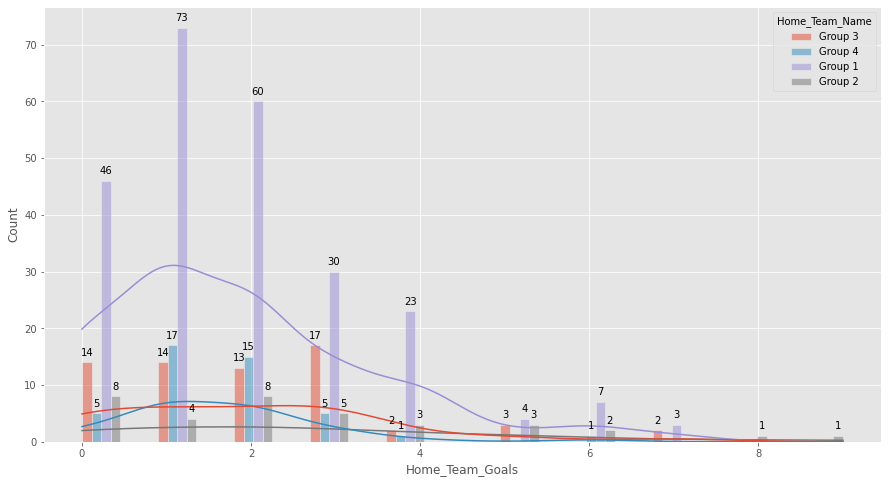

In [207]:
plt.figure(figsize=(15,8))
ax1=sns.histplot(data=data_4_group,x='Home_Team_Goals',hue='Home_Team_Name',kde=True,bins=20,multiple='dodge')

for p in ax1.patches:
        if p.get_height()!=0:
            ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                     textcoords='offset points')

In [208]:
data_4_group.groupby('Home_Team_Name').describe().T

Home_Team_Name               Group 1       Group 2       Group 3       Group 4
index           count     246.000000     35.000000     65.000000     44.000000
                mean      368.304878    340.057143    327.092308    350.750000
                std       244.253449    261.370589    227.845323    212.958247
                min         4.000000     32.000000      1.000000      2.000000
                25%       167.250000    141.500000    160.000000    177.000000
                50%       327.500000    258.000000    267.000000    354.500000
                75%       564.000000    555.500000    513.000000    463.000000
                max       851.000000    849.000000    816.000000    843.000000
Year            count     246.000000     35.000000     65.000000     44.000000
                mean     1979.577236   1976.514286   1976.400000   1979.909091
                std        22.929531     23.446273     21.963606     18.612097
                min      1930.000000   1934.000000   1930.000000   1930.000000
                25%      1963.000000   1962.000000   1962.000000   1966.000000
                50%      1982.000000   1974.000000   1974.000000   1984.000000
                75%      1998.000000   1998.000000   1994.000000   1991.000000
                max      2014.000000   2014.000000   2014.000000   2014.000000
Home_Team_Goals count     246.000000     35.000000     65.000000     44.000000
                mean        1.861789      2.600000      1.969231      1.636364
                std         1.561398      2.328847      1.639066      1.143046
                min         0.000000      0.000000      0.000000      0.000000
                25%         1.000000      1.000000      1.000000      1.000000
                50%         2.000000      2.000000      2.000000      1.500000
                75%         3.000000      4.000000      3.000000      2.000000
                max         7.000000      9.000000      7.000000      6.000000
Away_Team_Goals count     246.000000     35.000000     65.000000     44.000000
                mean        1.020325      0.885714      0.938462      1.090909
                std         1.104533      0.932152      0.916463      1.052531
                min         0.000000      0.000000      0.000000      0.000000
                25%         0.000000      0.000000      0.000000      0.000000
                50%         1.000000      1.000000      1.000000      1.000000
                75%         1.000000      1.000000      1.000000      1.000000
                max         7.000000      3.000000      5.000000      4.000000
Attendance      count     246.000000     35.000000     65.000000     44.000000
                mean    52644.215447  40094.171429  38993.230769  39020.590909
                std     26277.582457  23574.613191  20057.896435  22440.234530
                min      3000.000000   5890.000000   2000.000000   8829.000000
                25%     35055.250000  15709.000000  26000.000000  20929.250000
                50%     51004.500000  45000.000000  37000.000000  34854.500000
                75%     68500.250000  56274.000000  49471.000000  51745.250000
                max    173850.000000  84490.000000  91856.000000  96000.000000

# Gỉa định xoay quanh số bàn thắng của đội chủ nhà

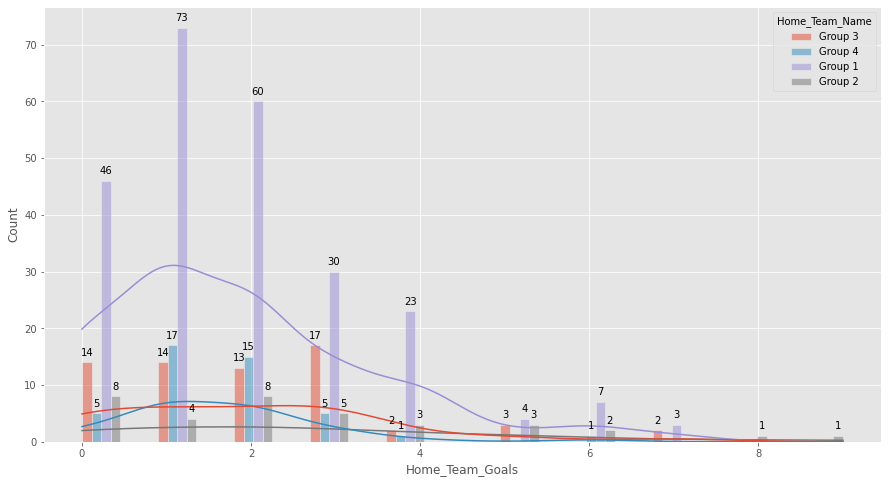

In [209]:
plt.figure(figsize=(15,8))
ax1=sns.histplot(data=data_4_group,x='Home_Team_Goals',hue='Home_Team_Name',kde=True,bins=20,multiple='dodge')

for p in ax1.patches:
        if p.get_height()!=0:
            ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                     textcoords='offset points')

Từ hình trên có thể thấy với các nước thuộc nhóm 1 thì số trận mà ghi được bàn cao hơn đáng kể so với các nhóm còn lại. Thậm chí với có 4 trận ghi tới 6 bàn, 2 trận ghi 7 bàn trong khi điều này với các nhóm còn lại là rất ít.

Tuy nhiên từ kde chủa các biểu đồ có thể thấy có nhiều giá trị ngoại lai từ 4 bàn trở lên, với số trận đạt được các bàn này chỉ từ 1-7 trận và số bàn ghi rất lớn => ảnh hưởng đến độ lệch chuẩn nên cần phải loại ra để tăng độ tin cậy cho dữ liệu

In [215]:
data_4_group[data_4_group.Home_Team_Goals<5].groupby('Home_Team_Name').describe().T

Home_Team_Name               Group 1       Group 2       Group 3       Group 4
index           count     232.000000     28.000000     60.000000     43.000000
                mean      383.568966    377.678571    334.816667    350.465116
                std       240.995437    268.125876    223.607669    215.470067
                min         4.000000     32.000000      1.000000      2.000000
                25%       191.500000    160.000000    171.250000    175.000000
                50%       350.500000    267.000000    274.500000    349.000000
                75%       575.250000    575.000000    513.250000    470.000000
                max       851.000000    849.000000    816.000000    843.000000
Year            count     232.000000     28.000000     60.000000     43.000000
                mean     1981.293103   1979.857143   1977.200000   1979.767442
                std        22.062884     23.462680     21.744900     18.808353
                min      1930.000000   1934.000000   1930.000000   1930.000000
                25%      1966.000000   1962.000000   1965.000000   1966.000000
                50%      1982.000000   1974.000000   1978.000000   1982.000000
                75%      1998.000000   1998.000000   1994.000000   1992.000000
                max      2014.000000   2014.000000   2014.000000   2014.000000
Home_Team_Goals count     232.000000     28.000000     60.000000     43.000000
                mean        1.616379      1.678571      1.650000      1.534884
                std         1.221839      1.362285      1.218849      0.934748
                min         0.000000      0.000000      0.000000      0.000000
                25%         1.000000      0.000000      1.000000      1.000000
                50%         1.000000      2.000000      2.000000      1.000000
                75%         2.000000      3.000000      3.000000      2.000000
                max         4.000000      4.000000      4.000000      4.000000
Away_Team_Goals count     232.000000     28.000000     60.000000     43.000000
                mean        0.974138      0.857143      0.933333      1.116279
                std         1.088795      0.931518      0.880421      1.051287
                min         0.000000      0.000000      0.000000      0.000000
                25%         0.000000      0.000000      0.000000      0.000000
                50%         1.000000      1.000000      1.000000      1.000000
                75%         1.000000      1.000000      1.000000      1.000000
                max         7.000000      3.000000      5.000000      4.000000
Attendance      count     232.000000     28.000000     60.000000     43.000000
                mean    52691.741379  43228.071429  39869.450000  39544.325581
                std     24801.766767  23691.553814  19645.158346  22432.059105
                min      3000.000000   5890.000000   2000.000000   8829.000000
                25%     35659.750000  21846.750000  27620.500000  22122.500000
                50%     51343.500000  46750.000000  37153.000000  35950.000000
                75%     68398.750000  63063.750000  49603.250000  52263.500000
                max    173850.000000  84490.000000  91856.000000  96000.000000

In [210]:
group1=data_4_group.Home_Team_Goals[(data_4_group.Home_Team_Name=='Group 1') & (data_4_group.Home_Team_Goals<5)].mean()
group2=data_4_group.Home_Team_Goals[(data_4_group.Home_Team_Name=='Group 2') & (data_4_group.Home_Team_Goals<5)].mean()
group3=data_4_group.Home_Team_Goals[(data_4_group.Home_Team_Name=='Group 3') & (data_4_group.Home_Team_Goals<5)].mean()
group4=data_4_group.Home_Team_Goals[(data_4_group.Home_Team_Name=='Group 4') & (data_4_group.Home_Team_Goals<5)].mean()

Text(1.7785714285714287, 45, 'Mean=1.68')

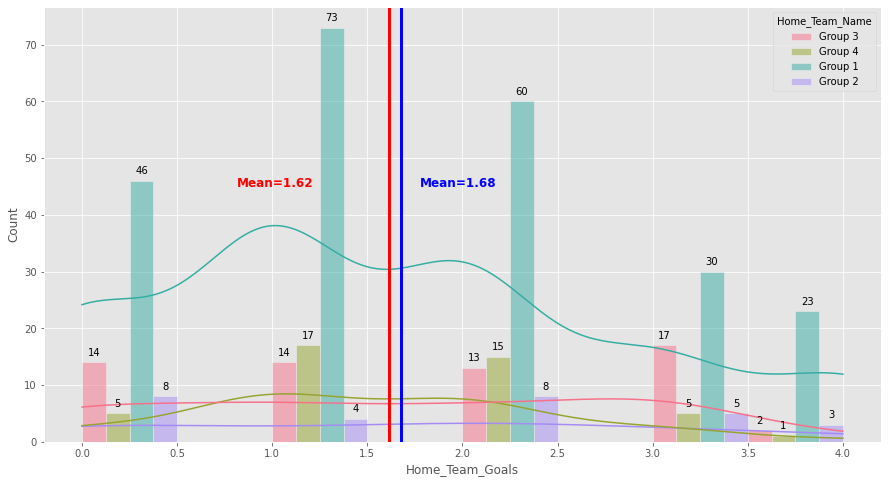

In [214]:
plt.figure(figsize=(15,8))
ax1=sns.histplot(data=data_4_group[data_4_group.Home_Team_Goals<5],x='Home_Team_Goals',
                 hue='Home_Team_Name',kde=True,bins=8,multiple='dodge',palette='husl')
a=ax1.get_facecolor()
colors=[]
for p in ax1.patches:
    b=p.get_facecolor()
    colors.append(b)
    if p.get_height()!=0:
            ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                     textcoords='offset points')
    
ax1.axvline(x=group1,lw=3,color='red')
ax1.text(group1-0.8,45,f'Mean={group1:.2f}',fontsize=12, color='red',fontweight='bold')

ax1.axvline(x=group2,lw=3,color='blue')
ax1.text(group2+0.1,45,f'Mean={group2:.2f}',fontsize=12, color='blue',fontweight='bold')



Có thể thấy sự khác biệt không đáng kể do phân bố bàn thắng giữa các nhóm khác khá rải rác, phương sai dao động rất lớn tới 1 bàn thắng

In [216]:
sameple1=data_4_group.Home_Team_Goals[(data_4_group.Home_Team_Name=='Group 1') & (data_4_group.Home_Team_Goals<5)]
sameple2=data_4_group.Home_Team_Goals[(data_4_group.Home_Team_Name=='Group 2') & (data_4_group.Home_Team_Goals<5)]
sameple3=data_4_group.Home_Team_Goals[(data_4_group.Home_Team_Name=='Group 3') & (data_4_group.Home_Team_Goals<5)]
sameple4=data_4_group.Home_Team_Goals[(data_4_group.Home_Team_Name=='Group 4') & (data_4_group.Home_Team_Goals<5)]

In [217]:
sc.stats.levene(sameple1,sameple2,sameple3,sameple4)

LeveneResult(statistic=1.2737304431208099, pvalue=0.2831563665899655)

- Kiểm định levene của 4 nhóm cho thấy phương sai của các nhóm mặc dù lớn nhưng khá đồng nhất
- Do đó có thể thực hiện kiểm định ANOVA thông thường

In [219]:
pg.anova(data=data_4_group[data_4_group.Home_Team_Goals<8],dv='Home_Team_Goals',between='Home_Team_Name',detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Home_Team_Name,7.528610,3,2.509537,1.030124,0.379154,0.007984
1,Within,935.481699,384,2.436150,NaN,NaN,NaN


Như dự oán kiểm định ANOVA không cho thấy sự khác biệt, có thể thấy phương sai trong các nhóm cũng gần như chênh lệch với phương sai giữa các nhóm => lượng nhiễu quá lớn, khó thấy được sự khác biệt giữa các nhóm

In [220]:
pg.pairwise_tukey(data=data_4_group[data_4_group.Home_Team_Goals<8],dv='Home_Team_Goals',between='Home_Team_Name')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Group 1,Group 2,1.861789,2.242424,-0.380636,0.289354,-1.315467,0.547359,-0.243209
1,Group 1,Group 3,1.861789,1.969231,-0.107442,0.217675,-0.493590,0.900000,-0.068670
2,Group 1,Group 4,1.861789,1.636364,0.225425,0.255480,0.882358,0.790135,0.144051
3,Group 2,Group 3,2.242424,1.969231,0.273193,0.333619,0.818877,0.825721,0.173661
4,Group 2,Group 4,2.242424,1.636364,0.606061,0.359430,1.686172,0.332527,0.384401
5,Group 3,Group 4,1.969231,1.636364,0.332867,0.304707,1.092417,0.672390,0.211766


- Ta tiến hành thử pairwise turkey để so sánh từng cặp 4 nhóm thì vẫn không phát hiện sự khác biệt nào
- Như vậy tạm kết luận đội chủ nhà mà thuộc cá đội của từng nhóm trên thì không thấy sự khác biệt nào về tỷ lệ ghi bàn. 
- Những đội nhóm 1 mặc dù có nhiều trận, ghi bàn nhiều hơn, nhưng khi quy về tỷ lệ chung cũng không chênh lệch mấy với chủ nhà là các nhóm khác

# Gỉa định xoay quanh số bàn thắng của đội khách

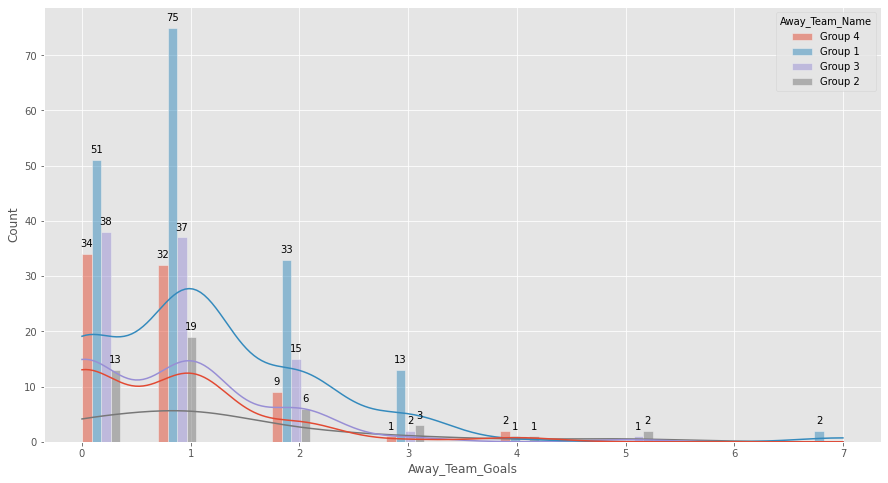

In [221]:
plt.figure(figsize=(15,8))
ax1=sns.histplot(data=data_4_group,x='Away_Team_Goals',hue='Away_Team_Name',kde=True,bins=20,multiple='dodge')

for p in ax1.patches:
        if p.get_height()!=0:
            ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                     textcoords='offset points')

Tương tự bước trên ta thấy khi lớn hơn 3 bàn thì có nhiều giá trị ngoại lai vì vậy tiến hành giới hạn lại dữ liệu

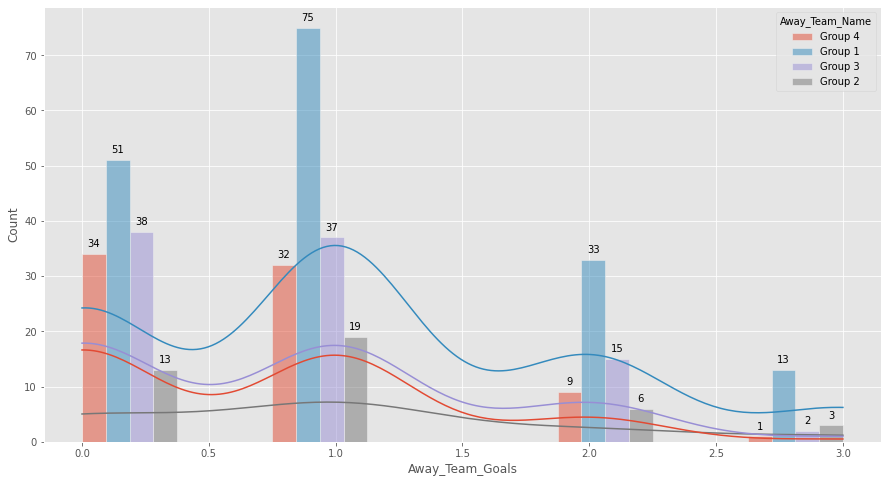

In [227]:
datas=data_4_group[data_4_group.Away_Team_Goals<4]
plt.figure(figsize=(15,8))
ax1=sns.histplot(data=datas,x='Away_Team_Goals',hue='Away_Team_Name',kde=True,bins=8,multiple='dodge')

for p in ax1.patches:
        if p.get_height()!=0:
            ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                     textcoords='offset points')

In [228]:
data_4_group[data_4_group.Away_Team_Goals<4].groupby('Away_Team_Name').describe().T

Away_Team_Name               Group 1       Group 2        Group 3  \
index           count     172.000000     41.000000      92.000000   
                mean      344.255814    293.682927     399.141304   
                std       233.343368    217.374382     257.552537   
                min         2.000000     29.000000      14.000000   
                25%       159.250000    116.000000     172.500000   
                50%       285.500000    273.000000     385.500000   
                75%       466.250000    428.000000     609.250000   
                max       851.000000    850.000000     843.000000   
Year            count     172.000000     41.000000      92.000000   
                mean     1977.767442   1973.024390    1982.043478   
                std        21.498089     21.739926      24.367116   
                min      1930.000000   1934.000000    1930.000000   
                25%      1962.000000   1958.000000    1965.000000   
                50%      1978.000000   1978.000000    1986.000000   
                75%      1991.000000   1990.000000    2002.000000   
                max      2014.000000   2014.000000    2014.000000   
Home_Team_Goals count     172.000000     41.000000      92.000000   
                mean        1.593023      1.926829       2.195652   
                std         1.445929      1.421095       1.665679   
                min         0.000000      0.000000       0.000000   
                25%         0.000000      1.000000       1.000000   
                50%         1.000000      2.000000       2.000000   
                75%         2.000000      3.000000       3.000000   
                max         8.000000      6.000000       7.000000   
Away_Team_Goals count     172.000000     41.000000      92.000000   
                mean        1.046512      0.975610       0.793478   
                std         0.890587      0.879994       0.791966   
                min         0.000000      0.000000       0.000000   
                25%         0.000000      0.000000       0.000000   
                50%         1.000000      1.000000       1.000000   
                75%         2.000000      1.000000       1.000000   
                max         3.000000      3.000000       3.000000   
Attendance      count     172.000000     41.000000      92.000000   
                mean    50877.302326  43030.414634   45546.369565   
                std     27011.935513  20228.308579   23398.285042   
                min      2000.000000  11000.000000    3000.000000   
                25%     32547.500000  26000.000000   29277.250000   
                50%     45331.000000  40750.000000   43543.500000   
                75%     67461.500000  62479.000000   62709.750000   
                max    173850.000000  74559.000000  138886.000000   

Away_Team_Name               Group 4  
index           count      76.000000  
                mean      352.973684  
                std       222.836979  
                min         1.000000  
                25%       165.500000  
                50%       347.000000  
                75%       516.750000  
                max       846.000000  
Year            count      76.000000  
                mean     1979.263158  
                std        20.771370  
                min      1930.000000  
                25%      1962.000000  
                50%      1982.000000  
                75%      1995.000000  
                max      2014.000000  
Home_Team_Goals count      76.000000  
                mean        2.315789  
                std         1.905854  
                min         0.000000  
                25%         1.000000  
                50%         2.000000  
                75%         3.000000  
                max         9.000000  
Away_Team_Goals count      76.000000  
                mean        0.697368  
                std         0.730657  
                min         0.000000  
                25%         0.000000  


In [237]:
group11=data_4_group.Away_Team_Goals[(data_4_group.Away_Team_Name=='Group 1') & (data_4_group.Away_Team_Goals<4)].mean()
group22=data_4_group.Away_Team_Goals[(data_4_group.Away_Team_Name=='Group 2') & (data_4_group.Away_Team_Goals<4)].mean()
group33=data_4_group.Away_Team_Goals[(data_4_group.Away_Team_Name=='Group 3') & (data_4_group.Away_Team_Goals<4)].mean()
group44=data_4_group.Away_Team_Goals[(data_4_group.Away_Team_Name=='Group 4') & (data_4_group.Away_Team_Goals<4)].mean()

In [238]:
print(group11,group22,group33,group44)

1.0465116279069768 0.975609756097561 0.7934782608695652 0.6973684210526315


In [239]:
sameple11=data_4_group.Away_Team_Goals[(data_4_group.Away_Team_Name=='Group 1') & (data_4_group.Away_Team_Goals<4)]
sameple22=data_4_group.Away_Team_Goals[(data_4_group.Away_Team_Name=='Group 2') & (data_4_group.Away_Team_Goals<4)]
sameple33=data_4_group.Away_Team_Goals[(data_4_group.Away_Team_Name=='Group 3') & (data_4_group.Away_Team_Goals<4)]
sameple44=data_4_group.Away_Team_Goals[(data_4_group.Away_Team_Name=='Group 4') & (data_4_group.Away_Team_Goals<4)]

Text(0.34736842105263155, 70, 'Mean=0.70')

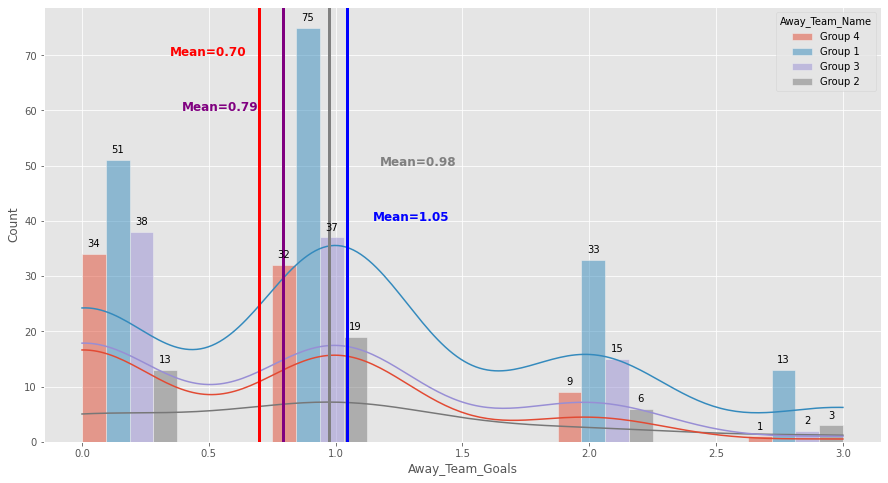

In [248]:
datas=data_4_group[data_4_group.Away_Team_Goals<4]
plt.figure(figsize=(15,8))
ax1=sns.histplot(data=datas,x='Away_Team_Goals',hue='Away_Team_Name',kde=True,bins=8,multiple='dodge')

for p in ax1.patches:
        if p.get_height()!=0:
            ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                     textcoords='offset points')
ax1.axvline(x=group11,lw=3,color='blue')
ax1.text(group11+0.1,40,f'Mean={group11:.2f}',fontsize=12, color='blue',fontweight='bold')

ax1.axvline(x=group22,lw=3,color='gray')
ax1.text(group22+0.2,50,f'Mean={group22:.2f}',fontsize=12, color='gray',fontweight='bold')

ax1.axvline(x=group33,lw=3,color='purple')
ax1.text(group33-0.4,60,f'Mean={group33:.2f}',fontsize=12, color='purple',fontweight='bold')

ax1.axvline(x=group44,lw=3,color='red')
ax1.text(group44-0.35,70,f'Mean={group44:.2f}',fontsize=12, color='red',fontweight='bold')

In [249]:
sc.stats.levene(sameple11,sameple22,sameple33,sameple44)

LeveneResult(statistic=0.12571569715138414, pvalue=0.9448587659124339)

Kiểm định levene không thấy 4 nhóm có sự khác biệt về phương sai => Dùng anova tường

In [250]:
pg.anova(data=datas,dv='Away_Team_Goals',between='Away_Team_Name',detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Away_Team_Name,8.065700,3,2.688567,3.843444,0.009873,0.029677
1,Within,263.719077,377,0.699520,NaN,NaN,NaN


- Lần này có thể thấy có sự khác biệt lớn giữa các nhóm. Như vậy các đội thuộc 4 nhóm tương ứng với thành tích đã từng đạt trong các kỳ WC có ảnh ưởng tới việc ghi bàn khi đóng vai trò là đội khách.
- Giờ ta sẽ tìm sự khác biệt này

In [251]:
pg.pairwise_tukey(data=datas,dv='Away_Team_Goals',between='Away_Team_Name',effsize='cohen')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,cohen
0,Group 1,Group 2,1.046512,0.975610,0.070902,0.145356,0.487780,0.900000,0.084773
1,Group 1,Group 3,1.046512,0.793478,0.253033,0.108030,2.342253,0.090355,0.302536
2,Group 1,Group 4,1.046512,0.697368,0.349143,0.115201,3.030740,0.013838,0.417449
3,Group 2,Group 3,0.975610,0.793478,0.182131,0.157051,1.159698,0.634685,0.217763
4,Group 2,Group 4,0.975610,0.697368,0.278241,0.162067,1.716830,0.316437,0.332676
5,Group 3,Group 4,0.793478,0.697368,0.096110,0.129644,0.741334,0.869190,0.114913


- Qua so sánh từng cặp, có thể thấy giữa nhóm 1 và nhóm 4 có sự khác biệt khá lớn do hệ số cohen=0.4.
- Để dễ dàng hình dung sự khác biệt ta cần chuyển hệ số này ở 2 nhóm 1 và 4 về dạng common language để dễ hình dung

In [252]:
pg.compute_effsize(sameple11,sameple44,paired=False,eftype='cles')

0.6062576499388005

In [253]:
pg.compute_effsize(sameple44,sameple11,paired=False,eftype='cles')

0.3937423500611995

- Trên là effect size CL = 0.606. Điều này hàm ý rằng ~61% các trận có sự tham gia của đội nhóm 1 sẽ ghi nhiều bàn thắng hơn nhóm 4. 39% các trận còn lại thì nhóm 1 sẽ ghi ít bàn hơn nhóm 4
- Như vậy khi là đội khách thì những nước thuộc nhóm 1 tức từng winner sẽ ghi được nhiều bàn hơn những nước thuộc nhóm 4 tức về thứ 4 trong WC.
- Từ đó ta có thể giả định, các nước từng về nhất trong WC cho dù là đội khách thì họ vẫn có khả năng ghi nhiều bàn thắng hơn các nước đứng hạng 4 trong WC khi là đội khách. 
- Hai nhóm còn lại không phát hiện sự khác biệt gì khi so sánh này, hàm ý nhóm 2, 3 có tỷ lệ ghi bàn nằm giữa 1 và 4 nên sự khác biệt là không rõ ràng, hoặc do nhiễu của 2 nhóm khá lớn nên ta không thể thấy được sự khác biệt giữa chúng.